In [1]:
import math
import collections
import urllib

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

In [3]:
hilo = getweather.getyear('HILO', ['TMIN', 'TMAX'], 2001)

Using ('USW00021504', 19.7192, -155.0531, 11.6, 'HI', 'HILO INTL AP', 'GSN', '', '91285').


In [4]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [5]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(19.137260273972604, 13.9, 22.2)

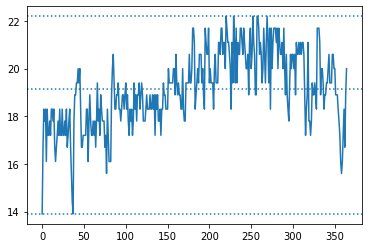

In [6]:
pp.plot(hilo['TMIN'])

for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')

In [7]:
# compute a standard deviation
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

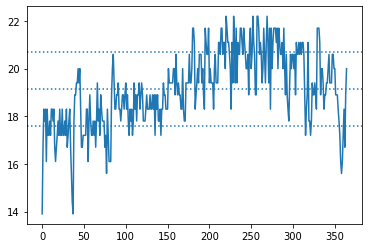

In [8]:
pp.plot(hilo['TMIN'])

for value in [mean, mean - err, mean+err]:
    pp.axhline(value, linestyle=':')

In [9]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']

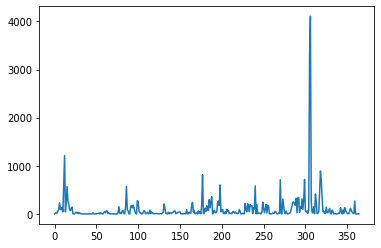

In [10]:
pp.plot(rain)

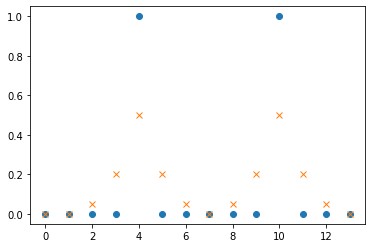

In [11]:
# correlate
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])

# add in second stage
mask = np.array([0.05,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask, 'same')

pp.plot(x, 'o')
pp.plot(y, 'x')

In [13]:
np.ones(10)/10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

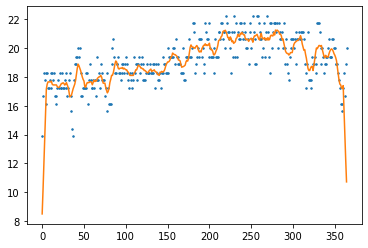

In [14]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))

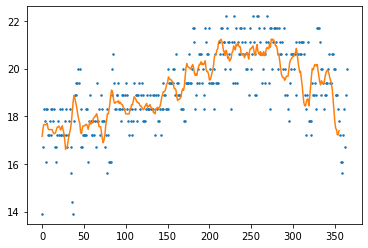

In [15]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))

In [16]:
# smoothing function
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

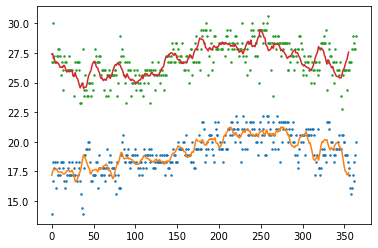

In [18]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(smooth(hilo['TMAX'], 10))

In [23]:
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    for obs in ['TMIN', 'TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])

        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(1.0, 365.0, 15.0, 30.0)

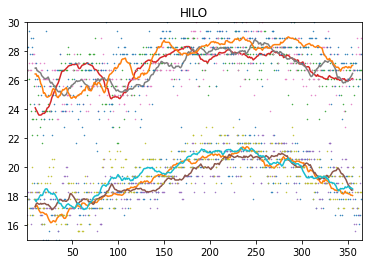

In [24]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

pp.axis(ymin=15,ymax=30)

Using ('USW00094728', 40.7789, -73.9692, 39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HCN', '72506').
Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').
Using ('USW00014922', 44.8831, -93.2289, 265.8, 'MN', 'MINNEAPOLIS/ST PAUL AP', 'GSN', 'HCN', '72658').


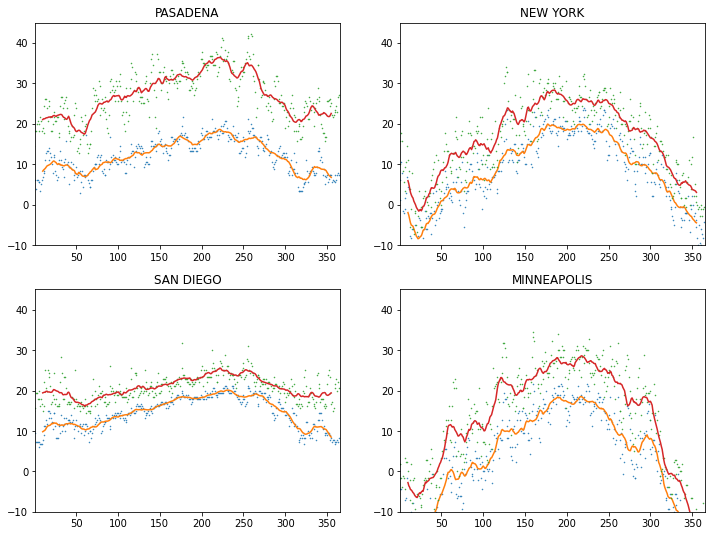

In [25]:
pp.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA', 'NEW YORK', 'SAN DIEGO', 'MINNEAPOLIS']):
    pp.subplot(2,2,i+1)
    plotsmooth(city, 2000)